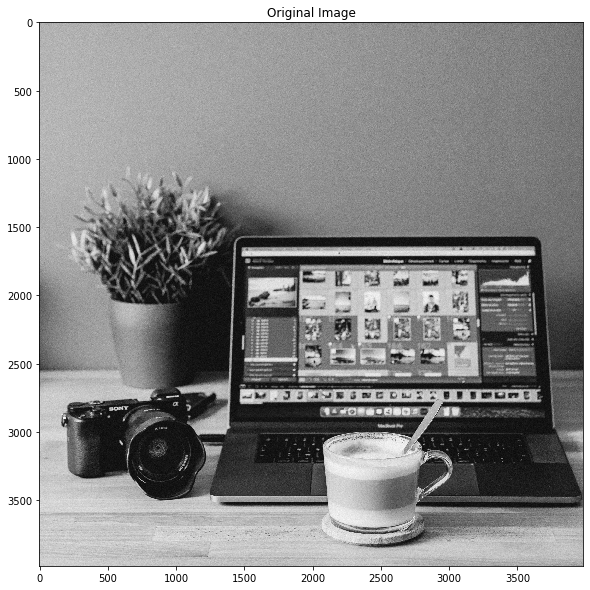

In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('canny.jpg',0)

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

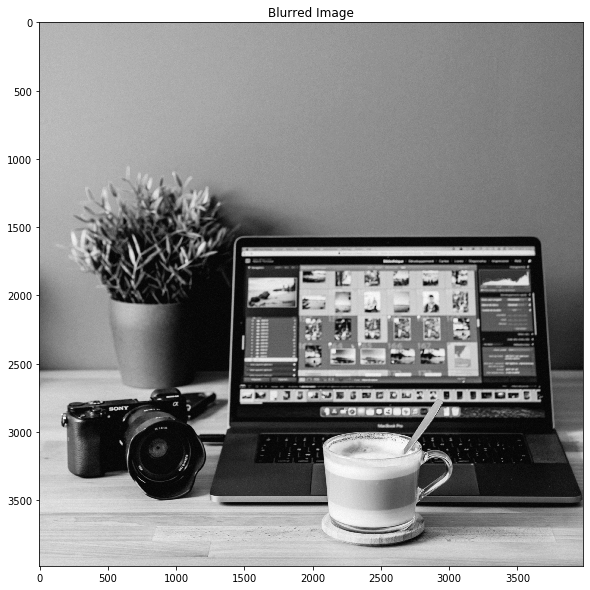

In [106]:
# Apply Gaussian smoothing
blur = cv2.GaussianBlur(img,(7,7),1.5)

# Display the blurred image
plt.figure(figsize=(10,10))
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image')
plt.show()

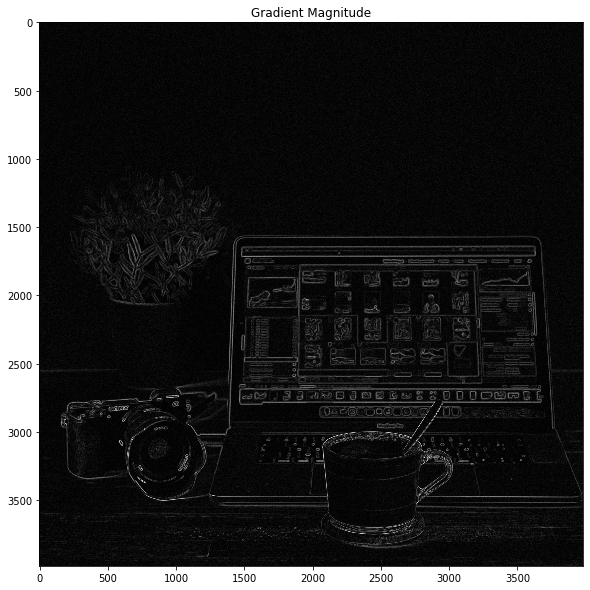

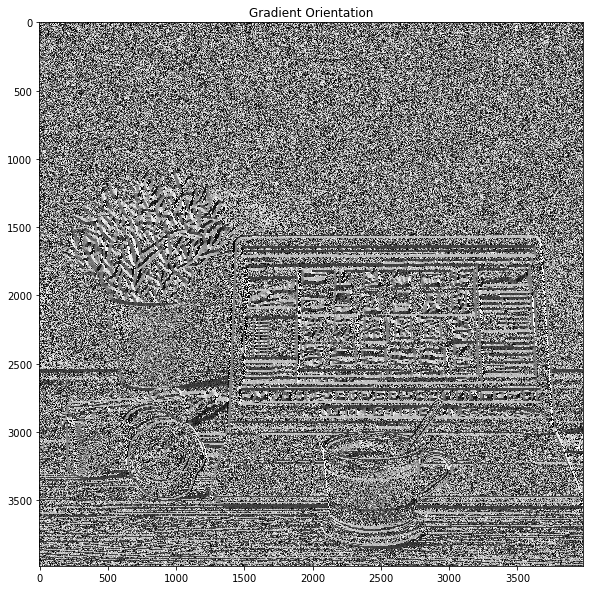

In [107]:
# Compute the gradient magnitude and orientation
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)
magnitude, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)

# Display the gradient magnitude and orientation
plt.figure(figsize=(10,10))
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(angle, cmap='gray')
plt.title('Gradient Orientation')
plt.show()

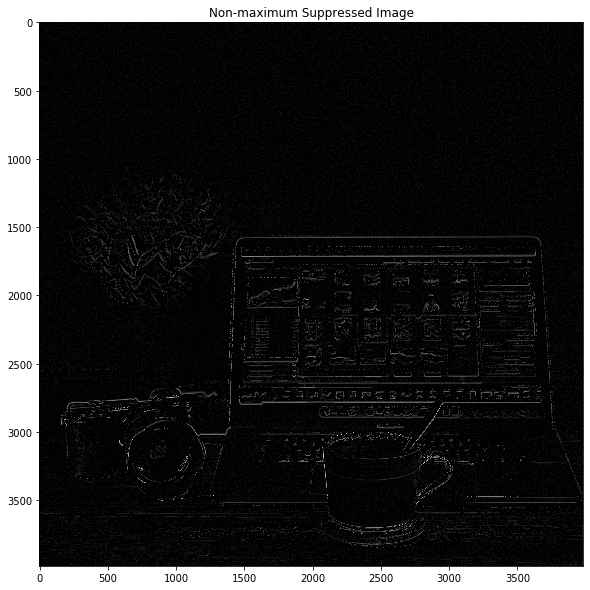

In [108]:
# Non-maximum suppression
magnitude_suppressed = np.zeros_like(magnitude)
for i in range(1, magnitude.shape[0]-1):
    for j in range(1, magnitude.shape[1]-1):
        if (angle[i][j] >= 0 and angle[i][j] < 22.5) or (angle[i][j] >= 157.5 and angle[i][j] <= 180):
            q = magnitude[i][j+1]
            r = magnitude[i][j-1]
        elif angle[i][j] >= 22.5 and angle[i][j] < 67.5:
            q = magnitude[i+1][j-1]
            r = magnitude[i-1][j+1]
        elif angle[i][j] >= 67.5 and angle[i][j] < 112.5:
            q = magnitude[i+1][j]
            r = magnitude[i-1][j]
        elif angle[i][j] >= 112.5 and angle[i][j] < 157.5:
            q = magnitude[i-1][j-1]
            r = magnitude[i+1][j+1]
        if magnitude[i][j] >= q and magnitude[i][j] >= r:
            magnitude_suppressed[i][j] = magnitude[i][j]

# Display the non-maximum suppressed imagnitudee
plt.figure(figsize=(10,10))
plt.imshow(magnitude_suppressed, cmap='gray')
plt.title('Non-maximum Suppressed Image')
plt.show()

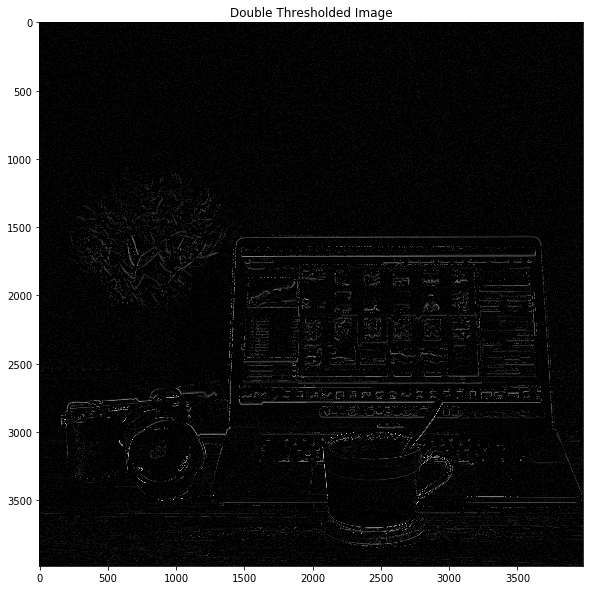

In [117]:
# Double thresholding
high_threshold = np.max(magnitude_suppressed)*0.0025
low_threshold = high_threshold*0.5

strong_edges = np.zeros_like(magnitude_suppressed)
weak_edges = np.zeros_like(magnitude_suppressed)
for i in range(magnitude_suppressed.shape[0]):
    for j in range(magnitude_suppressed.shape[1]):
        if magnitude_suppressed[i][j] >= high_threshold:
            strong_edges[i][j] = magnitude_suppressed[i][j]
        elif magnitude_suppressed[i][j] >= low_threshold:
            weak_edges[i][j] = magnitude_suppressed[i][j]

# Display the double thresholded image
plt.figure(figsize=(10,10))
plt.imshow(strong_edges, cmap='gray')
plt.title('Double Thresholded Image')
plt.show()

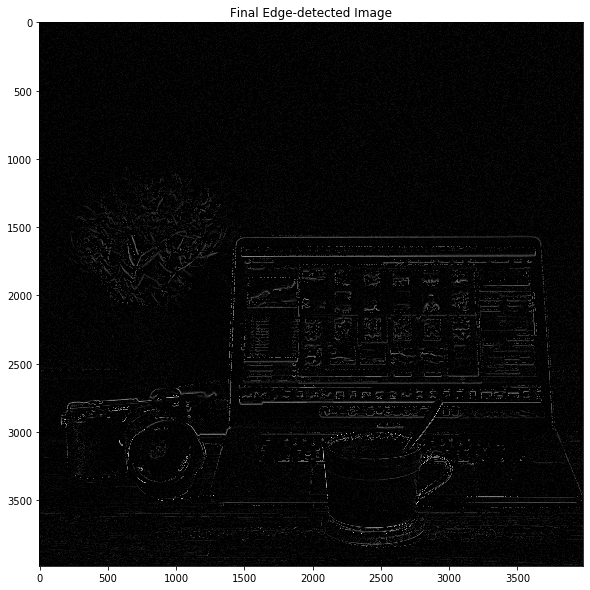

In [118]:
# Edge tracking by Hysteresis
final_edges = np.zeros_like(strong_edges)
for i in range(1, strong_edges.shape[0]-1):
    for j in range(1, strong_edges.shape[1]-1):
        if strong_edges[i][j] != 0:
            final_edges[i][j] = strong_edges[i][j]
            if weak_edges[i-1][j-1] != 0:
                final_edges[i-1][j-1] = strong_edges[i][j]
            if weak_edges[i-1][j] != 0:
                final_edges[i-1][j] = strong_edges[i][j]
            if weak_edges[i-1][j+1] != 0:
                final_edges[i-1][j+1] = strong_edges[i][j]
            if weak_edges[i][j-1] != 0:
                final_edges[i][j-1] = strong_edges[i][j]
            if weak_edges[i][j+1] != 0:
                final_edges[i][j+1] = strong_edges[i][j]
            if weak_edges[i+1][j-1] != 0:
                final_edges[i+1][j-1] = strong_edges[i][j]
            if weak_edges[i+1][j] != 0:
                final_edges[i+1][j] = strong_edges[i][j]
            if weak_edges[i+1][j+1] != 0:
                final_edges[i+1][j+1] = strong_edges[i][j]

# Display the final edge-detected image
plt.figure(figsize=(10,10))
plt.imshow(final_edges, cmap='gray')
plt.title('Final Edge-detected Image')
plt.show()

